In [1]:
import math
import sympy as sp
import numpy as np
from sympy.functions import sin,cos,exp
import matplotlib.pyplot as plt


<img src='4.png'></img>

# Approximate $e^x$



$e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + ...$

at point $x_0 = 0$, and evaluate the approximated function at $x=2$

In [2]:
x0 = 0
x = 3
print(math.exp(x))

20.085536923187668


In [3]:
e_approx_0 = np.exp(x0)
e_approx_1 = e_approx_0 + (x-x0)**1/math.factorial(1) * np.exp(x0)
e_approx_2 = e_approx_1 + (x-x0)**2/math.factorial(2) * np.exp(x0)
e_approx_3 = e_approx_2 + (x-x0)**3/math.factorial(3) * np.exp(x0)
e_approx_4 = e_approx_3 + (x-x0)**4/math.factorial(4) * np.exp(x0)
e_approx_5 = e_approx_4 + (x-x0)**5/math.factorial(5) * np.exp(x0)
print(e_approx_0)
print(e_approx_1)
print(e_approx_2)
print(e_approx_3)
print(e_approx_4)
print(e_approx_5)
print(math.exp(x))

1.0
4.0
8.5
13.0
16.375
18.4
20.085536923187668


---

# Exersice 1

- Define a function to approximate $e^x$ with order n. Use a loop not to be limited to a specific order of approximation. 

This Python function receives a point around which approximation is constructed ($x_0$),  a point ($x$) at which you evaluate the function, and the order of approximation ($n$). 

You can define the math function you want to approximate outsite of this Python function and use it inside.

- Use your function to approximate $e^x$ at $x_0=0$, evaluate at $x=3$ from n=0 to 10 and plot the error. Compare you results with the actual value of the function at $x$ .

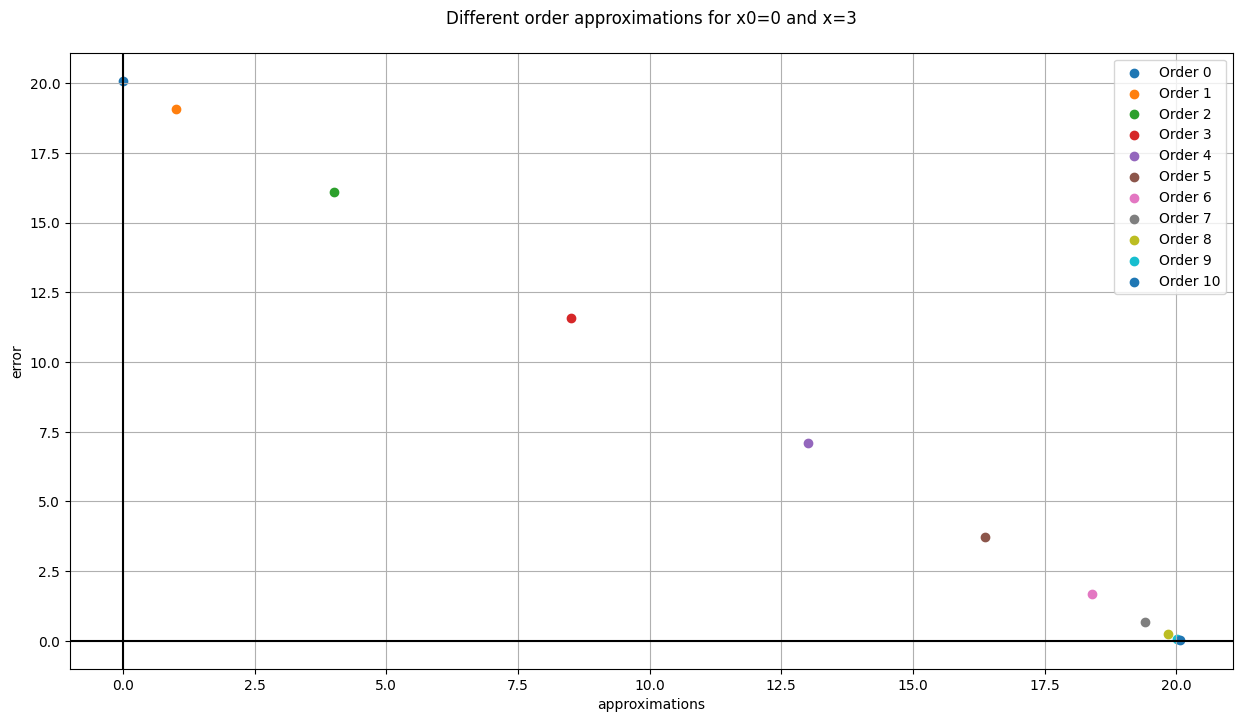

In [4]:
#Anwser exersice 1
def e_pow_x_approximation(x0, x, n):
    approx = 0
    for i in range(n):
        approx += ((np.exp(x0) / math.factorial(i)) * (x - x0)**i)
    error = np.abs(np.exp(x) - approx)
    return approx, error

x0 = 0
x = 3
n = 10

plt.figure(figsize=(15,8))
plt.axvline(x=0, c='black')
plt.axhline(y=0, c='black')
plt.xlabel('approximations')
plt.ylabel('error')
plt.grid()

for i in range(n + 1):
    approx, error = e_pow_x_approximation(x0, x, i)
    plt.scatter(approx, error, label = f"Order {i}")

plt.title(f'Different order approximations for x0={x0} and x={x}\n ')
plt.legend()
plt.show()

# Exersice 2


- Use your function to approximate $e^x$ for 20 point between 0 and 3 for different order and plot them.

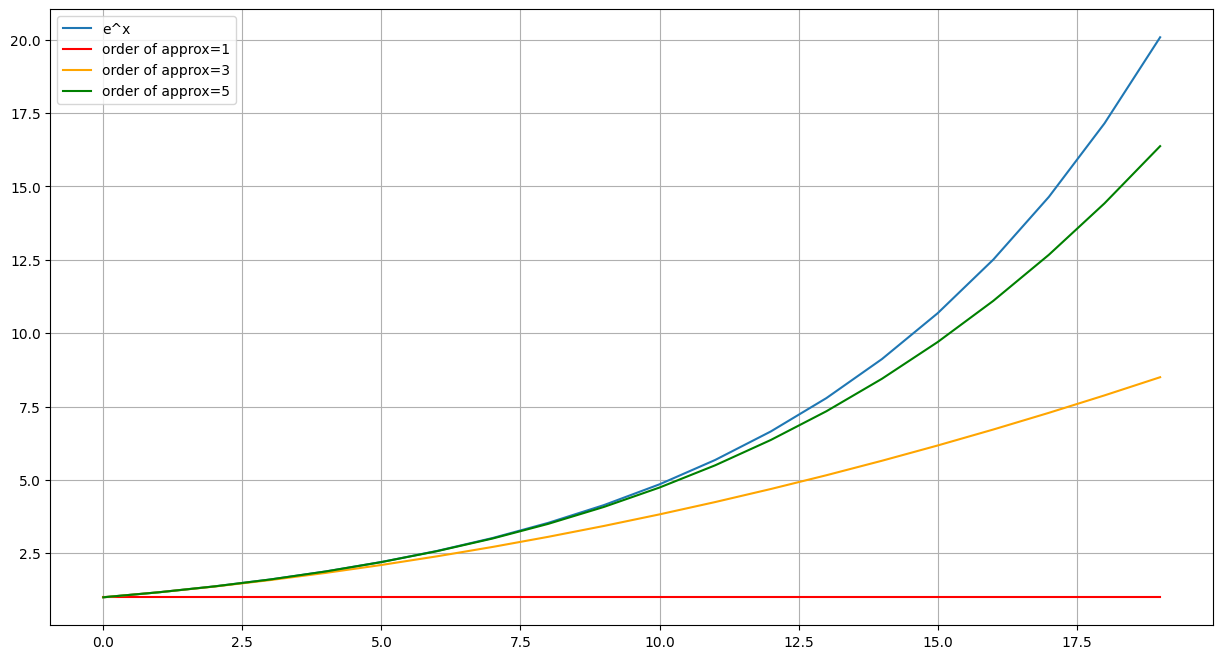

In [5]:
#Anwser exersice 2:
x_range = np.linspace(0, 3, 20)

x_approx_1 = []
x_approx_3 = []
x_approx_5 = []

for x in x_range:
    approx_1, error_1 = e_pow_x_approximation(0, x, 1)
    x_approx_1.append(approx_1)

for x in x_range:
    approx_3, error_3 = e_pow_x_approximation(0, x, 3)
    x_approx_3.append(approx_3)

for x in x_range:
    approx_5, error_5 = e_pow_x_approximation(0, x, 5)
    x_approx_5.append(approx_5)

x_approx_1 = np.array(x_approx_1)
x_approx_3 = np.array(x_approx_3)
x_approx_5 = np.array(x_approx_5)

plt.figure(figsize=(15, 8))
plt.plot(np.exp(x_range), label='e^x')
plt.plot(x_approx_1, c='red', label='order of approx=1')
plt.plot(x_approx_3, c='orange', label='order of approx=3')
plt.plot(x_approx_5, c='green', label='order of approx=5')
plt.grid()
plt.legend()
plt.show()

# Approximate $sin(x)$ and $cos(x)$

<img src='3.png'></img>

# Exersice 3

Approximate sin(x) and cos(x) and plot them for different orders (0,1,2,3,4)

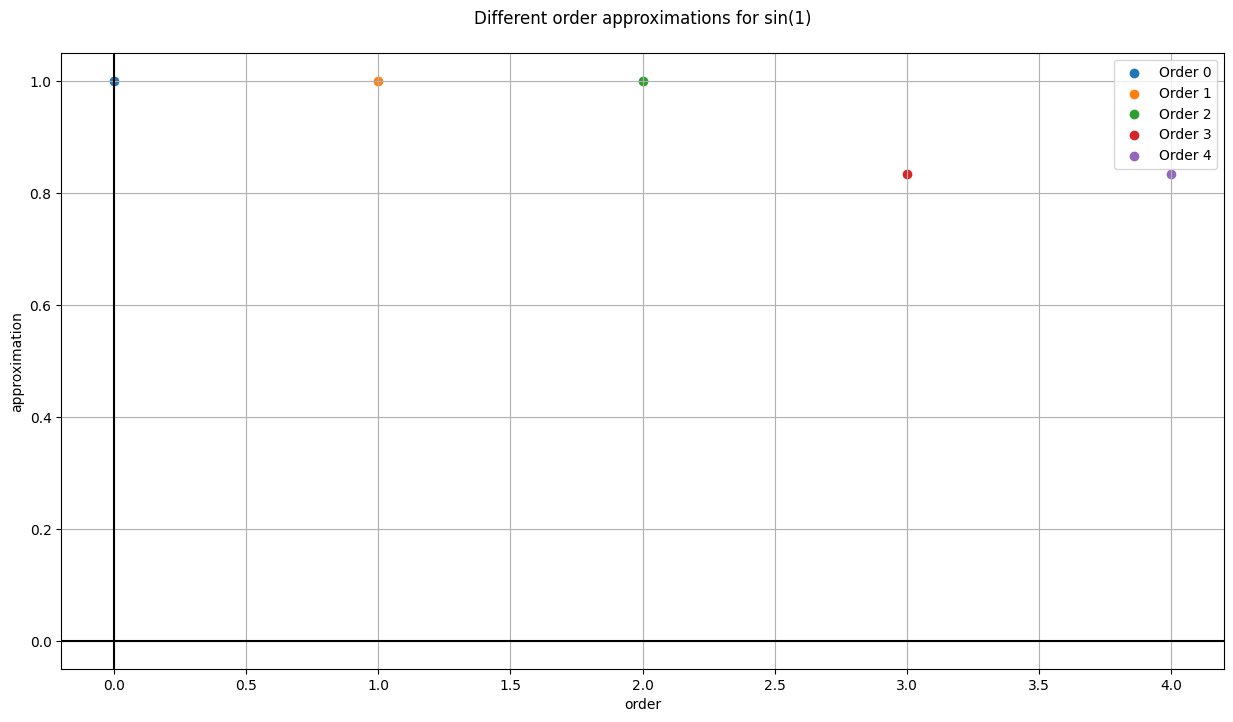

In [6]:
#Anwser exersice 3.1:
def sin_x_approximation(x, n):
    result = x
    mult = -1

    for i in range(3, n+1, 2): 
        result += (mult * (x**i / math.factorial(i)))
        mult *= -1

    return result

plt.figure(figsize=(15,8))
plt.axvline(x=0, c='black')
plt.axhline(y=0, c='black')
plt.xlabel('order')
plt.ylabel('approximation')
plt.grid()

x=1

for i in range(5):
    approx = sin_x_approximation(x, i)
    plt.scatter(i, approx, label = f"Order {i}")

plt.title(f'Different order approximations for sin({x})\n ')
plt.legend()
plt.show()

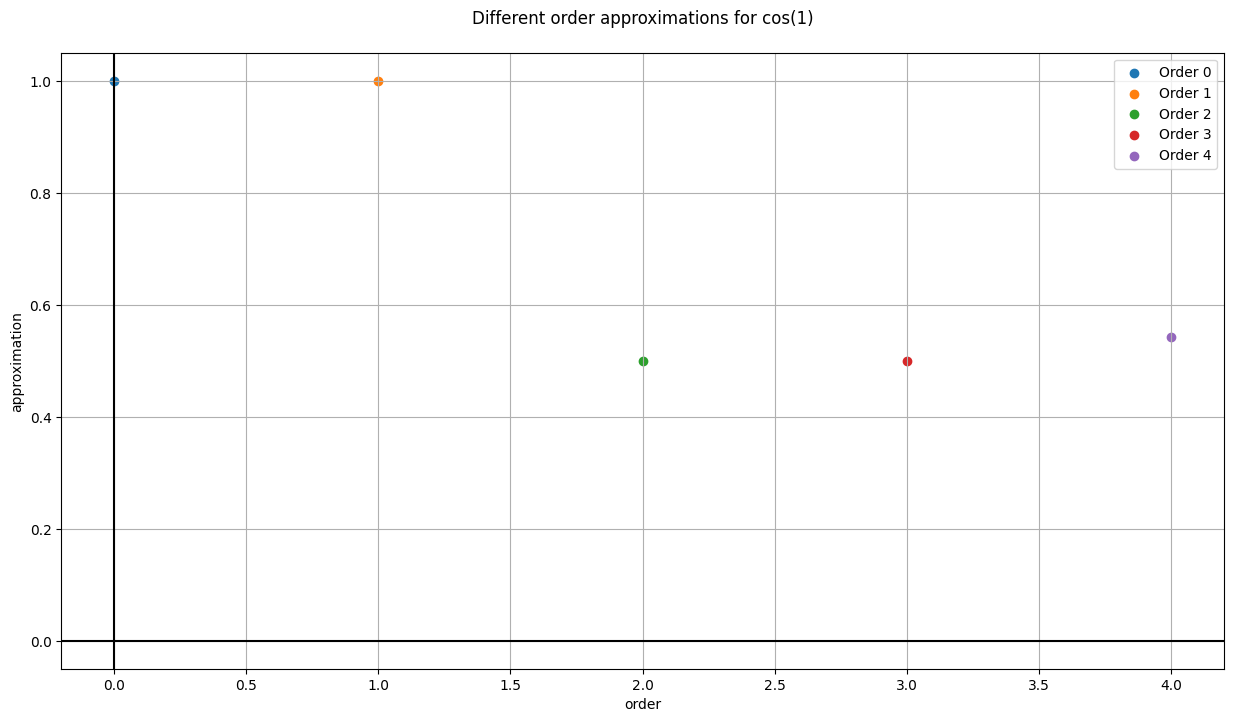

In [7]:
#Anwser exersice 3.2:
def cos_x_approximation(x, n):
    result = 1 
    mult = -1

    for i in range(2, n+1, 2): 
        result += (mult * (x**i / math.factorial(i)))
        mult *= -1 

    return result

plt.figure(figsize=(15,8))
plt.axvline(x=0, c='black')
plt.axhline(y=0, c='black')
plt.xlabel('order')
plt.ylabel('approximation')
plt.grid()

x=1

for i in range(5):
    approx = cos_x_approximation(x, i)
    plt.scatter(i, approx, label = f"Order {i}")

plt.title(f'Different order approximations for cos({x})\n ')
plt.legend()
plt.show()

# Taylor approximation

<img src='4.png'></img>

---

# Exersice 4

- Write a function in which you use sympy to calculate Taylor approximation. This Python function receives a point around which approximation is constructed ($x_0$), and the order of approximation ($n$). You can define the math function you want to approximate outsite of this Python function and use it inside.


- Use your function to aproximate $sin$, $cos$ and $e^x$ at $x_0 = 2$ for order 5.


In [8]:
#Anwser exersice 4.1:
def taylor_approximation(x0, n, function):
    approx = 0.0
    derivative = function
    for i in range(n+1):
        term = (derivative.subs(x, x0) / sp.factorial(i)) * (x - x0)**i
        approx += term
        derivative = derivative.diff(x)
    return approx

In [9]:
#Anwser exersice 4.2:
x = sp.Symbol('x')
n = 5
x0 = 2

f1 = sp.sin(x)
f2 = sp.cos(x)
f3 = sp.exp(x)

f1_approx = taylor_approximation(x0, n, f1)
f2_approx = taylor_approximation(x0, n, f2)
f3_approx = taylor_approximation(x0, n, f3)

print(f"Order {n} approximation for f(x) = {f1} at x0 = {x0} is equal to: \n{f1_approx} \n")
print(f"Order {n} approximation for f(x) = {f2} at x0 = {x0} is equal to: \n{f2_approx} \n")
print(f"Order {n} approximation for f(x) = {f3} at x0 = {x0} is equal to: \n{f3_approx} \n")

Order 5 approximation for f(x) = sin(x) at x0 = 2 is equal to: 
(x - 2)**5*cos(2)/120 + (x - 2)**4*sin(2)/24 - (x - 2)**3*cos(2)/6 - (x - 2)**2*sin(2)/2 + (x - 2)*cos(2) + sin(2) 

Order 5 approximation for f(x) = cos(x) at x0 = 2 is equal to: 
-(x - 2)**5*sin(2)/120 + (x - 2)**4*cos(2)/24 + (x - 2)**3*sin(2)/6 - (x - 2)**2*cos(2)/2 - (x - 2)*sin(2) + cos(2) 

Order 5 approximation for f(x) = exp(x) at x0 = 2 is equal to: 
(x - 2)**5*exp(2)/120 + (x - 2)**4*exp(2)/24 + (x - 2)**3*exp(2)/6 + (x - 2)**2*exp(2)/2 + (x - 2)*exp(2) + exp(2) 

